In [1]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.2 MB/s eta 0:00:00


In [2]:
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import tensorflow_addons as tfa

In [14]:
#import all the libraries
import os
import pandas as pd
import numpy as np
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
# load a saved model
from tensorflow.keras.models import load_model
from keras.applications.xception import Xception
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

# Load Test data

In [5]:
!unzip "/content/drive/MyDrive/archive (1).zip" -d "/content/Data"

Streaming output truncated to the last 5000 lines.
  inflating: /content/Data/train/images/2829342.jpg  
  inflating: /content/Data/train/images/2829344.jpg  
  inflating: /content/Data/train/images/2829347.jpg  
  inflating: /content/Data/train/images/2829351.jpg  
  inflating: /content/Data/train/images/2829357.jpg  
  inflating: /content/Data/train/images/2829359.jpg  
  inflating: /content/Data/train/images/2829362.jpg  
  inflating: /content/Data/train/images/2829366.jpg  
  inflating: /content/Data/train/images/2829369.jpg  
  inflating: /content/Data/train/images/2829372.jpg  
  inflating: /content/Data/train/images/2829373.jpg  
  inflating: /content/Data/train/images/2829377.jpg  
  inflating: /content/Data/train/images/2829378.jpg  
  inflating: /content/Data/train/images/2829381.jpg  
  inflating: /content/Data/train/images/2829382.jpg  
  inflating: /content/Data/train/images/2829383.jpg  
  inflating: /content/Data/train/images/2829385.jpg  
  inflating: /content/Data/trai

In [19]:
test_df = pd.read_csv("/content/Data/test_ApKoW4T.csv")
test_path = "/content/Data/train/images/"
images = []
for i in range(len(test_df)):
  img_path = test_df['image'].iloc[i]
  img = image.load_img(test_path + img_path,target_size = (224,224))
  img = image.img_to_array(img)
  img = img/255
  img = np.expand_dims(img,axis=0)
  images.append(img)

In [24]:
# stack up images list to pass for prediction
images = np.vstack(images)

In [26]:
images.shape

(2680, 224, 224, 3)

# Load saved model & inference.

In [9]:
saved_model = load_model('/content/drive/MyDrive/best_model.h5')

In [10]:
saved_model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0003), loss = 'categorical_crossentropy',metrics = [tfa.metrics.CohenKappa(num_classes=5),tfa.metrics.F1Score(num_classes=5),'categorical_accuracy',])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [28]:
pred = saved_model.predict(images, batch_size=32)
print(pred)

84/84 [==============================] - 21s 140ms/step
[[1.0856250e-10 7.3581585e-11 3.7045306e-12 1.0000000e+00 5.4991095e-11]
 [1.5883159e-09 6.8430117e-10 6.0186983e-10 1.0000000e+00 2.2819069e-09]
 [1.8310467e-07 6.7469735e-08 1.9287203e-08 9.9999857e-01 1.1690363e-06]
 ...
 [2.9015455e-01 8.4286321e-06 2.4299025e-05 7.0532525e-01 4.4875224e-03]
 [5.1048794e-03 3.2408567e-04 4.4496384e-04 9.9408889e-01 3.7246664e-05]
 [7.0655197e-08 1.2686682e-09 8.1200682e-09 9.9999988e-01 7.9503089e-09]]


In [34]:
res = np.argmax(pred,axis=1)

Create a prediction file.

In [42]:
sub = pd.DataFrame()
sub['image'] = test_df['image']
sub['category'] = pd.Series(res)

In [43]:
sub

,image,category
0,1007700.jpg,3
1,1011369.jpg,3
2,1051155.jpg,3
3,1062001.jpg,1
4,1069397.jpg,3
...,...,...
2675,950995.jpg,3
2676,951046.jpg,3
2677,951323.jpg,3
2678,952113.jpg,3


In [45]:
sub['category'].value_counts()

0    902
4    562
1    480
2    369
3    367
Name: category, dtype: int64

Visualize the test images & predicted labels.

In [48]:
ship = {'Cargo': 1, 
'Military': 2, 
'Carrier': 3, 
'Cruise': 4, 
'Tankers': 5}

In [49]:
# reverse the ship type dictionary
ship = dict([[v,k] for k,v in ship.items()])

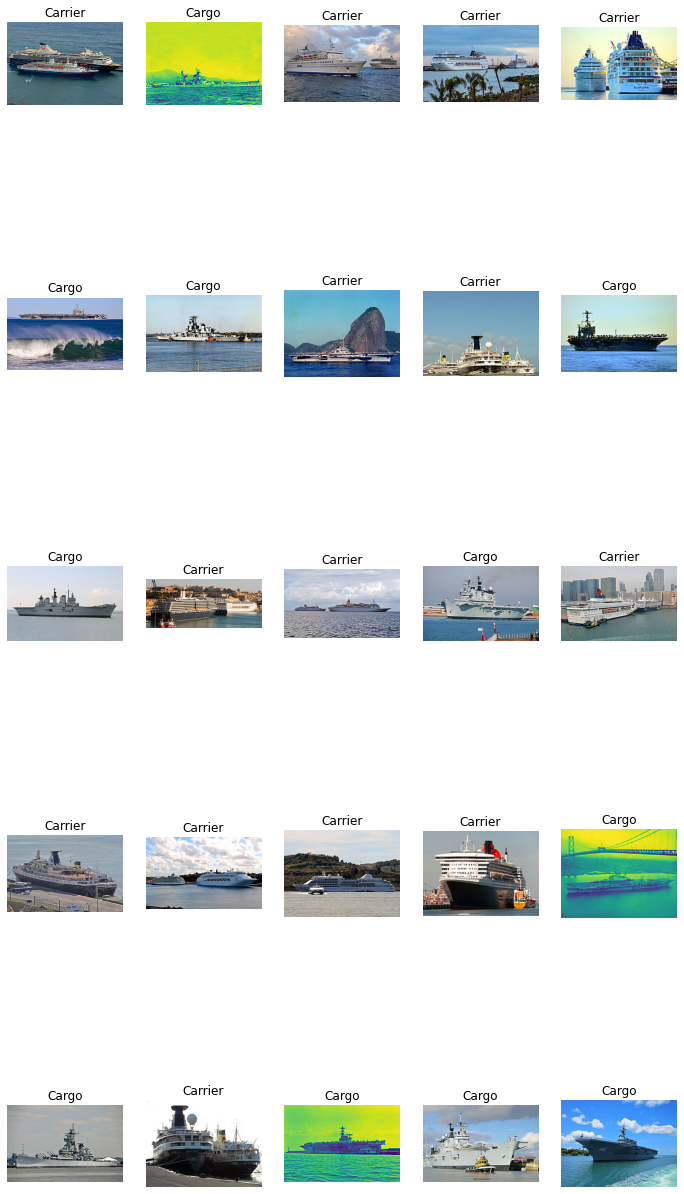

In [54]:
# visualize the top 25 train images
plt.figure(figsize=(12,24))

for i in range(200,225): 
  plt.subplot(5,5,i-199)
  label = res[i]
  img_path = sub['image'].iloc[i]
  plt.title(f'{ship[label]}')
  img = plt.imread(test_path + "/" + img_path)
  plt.imshow(img)
  plt.axis('off')
plt.show()

In [46]:
sub.to_csv("mysubmission.csv",index=False)